In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
data = pd.read_csv('All_providers.csv')

In [13]:
data_2014_12=data[data.dec2014_v3==1]

In [14]:
data_2015_6=data[data.jun2015_v4==1]
data_2015_12=data[data.dec2015_v4==1]
data_2016_6=data[data.jun2016_v3==1]
data_2016_12=data[data.dec2016_v2==1]
data_2017_6=data[data.jun2017_v2==1]
data_2017_12=data[data.dec2017_v2==1]
data_2018_6=data[data.jun2018_v1==1]

### 2015

In [58]:
data_2015=pd.merge(data_2014_12,data_2015_6, on = 'HoldingCompanyName', how = 'outer')

In [59]:
data_2015 = data_2015.fillna(0)

In [60]:
data_2015.columns

Index(['HoldingCompanyName', 'avgaddown_x', 'avgadup_x', 'consumer_x',
       'dec2014_v3_x', 'dec2015_v4_x', 'dec2016_v2_x', 'dec2017_v2_x',
       'distinct_blocks_x', 'jun2015_v4_x', 'jun2016_v3_x', 'jun2017_v2_x',
       'jun2018_v1_x', 'maxaddown_x', 'maxadup_x', 'states_x', 'avgaddown_y',
       'avgadup_y', 'consumer_y', 'dec2014_v3_y', 'dec2015_v4_y',
       'dec2016_v2_y', 'dec2017_v2_y', 'distinct_blocks_y', 'jun2015_v4_y',
       'jun2016_v3_y', 'jun2017_v2_y', 'jun2018_v1_y', 'maxaddown_y',
       'maxadup_y', 'states_y'],
      dtype='object')

In [62]:
data_2015['avgaddown'] = data_2015.avgaddown_y - data_2015.avgaddown_x

In [63]:
data_2015['avgadup'] = data_2015.avgadup_y - data_2015.avgadup_x
data_2015['consumer'] = data_2015.consumer_y -data_2015.consumer_x
data_2015['states'] = data_2015.states_y - data_2015.states_x

In [64]:
data_2015 = data_2015[['HoldingCompanyName','avgaddown','avgadup','consumer','states']]

In [66]:
model_data_2015 = data_2015[['avgaddown','avgadup','consumer','states']]

In [72]:
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs

In [83]:
from sklearn import preprocessing
scaled_data = preprocessing.MaxAbsScaler().fit_transform(model_data_2015)

In [84]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(scaled_data))

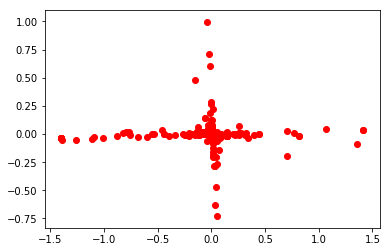

In [85]:
plt.scatter(transformed[0], transformed[1], label='Class 1', c='red')


In [87]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(scaled_data)
Kmean.cluster_centers_

array([[ 1.96962454e-03,  1.03799338e-03,  5.96497940e-04,
        -1.95293428e-04],
       [ 8.17040507e-01,  6.45779249e-01,  7.64167598e-04,
         1.32653061e-02],
       [-8.02696358e-01, -5.93259024e-01, -1.49718163e-03,
        -5.21541950e-02]])

In [90]:
data_2015['group']=Kmean.labels_

F:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [92]:
data_2015_second_half=pd.merge(data_2015_6,data_2015_12, on = 'HoldingCompanyName', how = 'outer')
data_2015_second_half = data_2015_second_half.fillna(0)
data_2015_second_half['avgaddown'] = data_2015_second_half.avgaddown_y - data_2015_second_half.avgaddown_x
data_2015_second_half['avgadup'] = data_2015_second_half.avgadup_y - data_2015_second_half.avgadup_x
data_2015_second_half['consumer'] = data_2015_second_half.consumer_y -data_2015_second_half.consumer_x
data_2015_second_half['states'] = data_2015_second_half.states_y - data_2015_second_half.states_x
data_2015_second_half = data_2015_second_half[['HoldingCompanyName','avgaddown','avgadup','consumer','states']]
model_data_2015_second_half = data_2015_second_half[['avgaddown','avgadup','consumer','states']]
scaled_data = preprocessing.MaxAbsScaler().fit_transform(model_data_2015_second_half)
Kmean = KMeans(n_clusters=3)
Kmean.fit(scaled_data)
data_2015_second_half['group']=Kmean.labels_
Kmean.cluster_centers_

array([[ 7.11781699e-03,  3.54188417e-03, -4.76230827e-05,
         4.05317769e-04],
       [ 7.28334186e-01,  5.77316770e-01,  1.54175558e-03,
         6.74019608e-03],
       [-9.63712999e-01, -7.48331493e-01, -1.81172964e-03,
        -1.62037037e-02]])

In [95]:
data_2016_first_half=pd.merge(data_2015_12,data_2016_6, on = 'HoldingCompanyName', how = 'outer')
data_2016_first_half = data_2016_first_half.fillna(0)
data_2016_first_half['avgaddown'] = data_2016_first_half.avgaddown_y - data_2016_first_half.avgaddown_x
data_2016_first_half['avgadup'] = data_2016_first_half.avgadup_y - data_2016_first_half.avgadup_x
data_2016_first_half['consumer'] = data_2016_first_half.consumer_y -data_2016_first_half.consumer_x
data_2016_first_half['states'] = data_2016_first_half.states_y - data_2016_first_half.states_x
data_2016_first_half = data_2016_first_half[['HoldingCompanyName','avgaddown','avgadup','consumer','states']]
model_data_2016_first_half = data_2016_first_half[['avgaddown','avgadup','consumer','states']]
scaled_data = preprocessing.MaxAbsScaler().fit_transform(model_data_2016_first_half)
Kmean = KMeans(n_clusters=3)
Kmean.fit(scaled_data)
data_2016_first_half['group']=Kmean.labels_
Kmean.cluster_centers_

array([[ 6.68723155e-03,  2.90351213e-03,  4.78251865e-04,
         9.12013157e-04],
       [ 8.33455029e-01,  7.44923633e-01,  1.50708980e-03,
         2.55102041e-02],
       [-8.61293794e-01, -5.91406512e-01, -3.34589938e-03,
        -2.85714286e-02]])

In [96]:
data_2016_second_half=pd.merge(data_2016_6,data_2016_12, on = 'HoldingCompanyName', how = 'outer')
data_2016_second_half = data_2016_second_half.fillna(0)
data_2016_second_half['avgaddown'] = data_2016_second_half.avgaddown_y - data_2016_second_half.avgaddown_x
data_2016_second_half['avgadup'] = data_2016_second_half.avgadup_y - data_2016_second_half.avgadup_x
data_2016_second_half['consumer'] = data_2016_second_half.consumer_y -data_2016_second_half.consumer_x
data_2016_second_half['states'] = data_2016_second_half.states_y - data_2016_second_half.states_x
data_2016_second_half = data_2016_second_half[['HoldingCompanyName','avgaddown','avgadup','consumer','states']]
model_data_2016_second_half = data_2016_second_half[['avgaddown','avgadup','consumer','states']]
scaled_data = preprocessing.MaxAbsScaler().fit_transform(model_data_2016_second_half)
Kmean = KMeans(n_clusters=3)
Kmean.fit(scaled_data)
data_2016_second_half['group']=Kmean.labels_
Kmean.cluster_centers_

array([[ 7.03435542e-03,  3.60636140e-03,  2.78194851e-04,
         6.56064662e-05],
       [ 7.44607986e-01,  6.00903943e-01,  2.83155134e-03,
         2.11352657e-02],
       [-6.91280182e-01, -5.04509127e-01, -1.49043214e-02,
        -3.73563218e-02]])

In [97]:
data_2017_first_half=pd.merge(data_2016_12,data_2017_6, on = 'HoldingCompanyName', how = 'outer')
data_2017_first_half = data_2017_first_half.fillna(0)
data_2017_first_half['avgaddown'] = data_2017_first_half.avgaddown_y - data_2017_first_half.avgaddown_x
data_2017_first_half['avgadup'] = data_2017_first_half.avgadup_y - data_2017_first_half.avgadup_x
data_2017_first_half['consumer'] = data_2017_first_half.consumer_y -data_2017_first_half.consumer_x
data_2017_first_half['states'] = data_2017_first_half.states_y - data_2017_first_half.states_x
data_2017_first_half = data_2017_first_half[['HoldingCompanyName','avgaddown','avgadup','consumer','states']]
model_data_2017_first_half = data_2017_first_half[['avgaddown','avgadup','consumer','states']]
scaled_data = preprocessing.MaxAbsScaler().fit_transform(model_data_2017_first_half)
Kmean = KMeans(n_clusters=3)
Kmean.fit(scaled_data)
data_2017_first_half['group']=Kmean.labels_
Kmean.cluster_centers_

array([[ 4.29280035e-03,  2.36383844e-03,  7.45914284e-04,
         1.74581006e-03],
       [ 7.68675604e-01,  6.17814237e-01,  1.73210925e-03,
         3.40909091e-02],
       [-8.25833384e-01, -7.29847631e-01, -1.85910596e-03,
        -3.85802469e-02]])

In [98]:
data_2017_second_half=pd.merge(data_2017_6,data_2017_12, on = 'HoldingCompanyName', how = 'outer')
data_2017_second_half = data_2017_second_half.fillna(0)
data_2017_second_half['avgaddown'] = data_2017_second_half.avgaddown_y - data_2017_second_half.avgaddown_x
data_2017_second_half['avgadup'] = data_2017_second_half.avgadup_y - data_2017_second_half.avgadup_x
data_2017_second_half['consumer'] = data_2017_second_half.consumer_y -data_2017_second_half.consumer_x
data_2017_second_half['states'] = data_2017_second_half.states_y - data_2017_second_half.states_x
data_2017_second_half = data_2017_second_half[['HoldingCompanyName','avgaddown','avgadup','consumer','states']]
model_data_2017_second_half = data_2017_second_half[['avgaddown','avgadup','consumer','states']]
scaled_data = preprocessing.MaxAbsScaler().fit_transform(model_data_2017_second_half)
Kmean = KMeans(n_clusters=3)
Kmean.fit(scaled_data)
data_2017_second_half['group']=Kmean.labels_
Kmean.cluster_centers_

array([[ 7.95887183e-03,  5.06858185e-03,  2.31443450e-04,
         9.58326488e-05],
       [ 8.33886741e-01,  6.73496085e-01,  3.06703728e-03,
         1.87500000e-02],
       [-7.70593054e-01, -6.78127325e-01, -7.77432480e-03,
        -2.12418301e-02]])

In [99]:
data_2018_first_half=pd.merge(data_2017_12,data_2018_6, on = 'HoldingCompanyName', how = 'outer')
data_2018_first_half = data_2018_first_half.fillna(0)
data_2018_first_half['avgaddown'] = data_2018_first_half.avgaddown_y - data_2018_first_half.avgaddown_x
data_2018_first_half['avgadup'] = data_2018_first_half.avgadup_y - data_2018_first_half.avgadup_x
data_2018_first_half['consumer'] = data_2018_first_half.consumer_y -data_2018_first_half.consumer_x
data_2018_first_half['states'] = data_2018_first_half.states_y - data_2018_first_half.states_x
data_2018_first_half = data_2018_first_half[['HoldingCompanyName','avgaddown','avgadup','consumer','states']]
model_data_2018_first_half = data_2018_first_half[['avgaddown','avgadup','consumer','states']]
scaled_data = preprocessing.MaxAbsScaler().fit_transform(model_data_2018_first_half)
Kmean = KMeans(n_clusters=3)
Kmean.fit(scaled_data)
data_2018_first_half['group']=Kmean.labels_
Kmean.cluster_centers_

array([[ 5.91650475e-03,  3.98280857e-03, -1.02316980e-03,
        -4.56501891e-04],
       [ 7.66106331e-01,  7.41320797e-01,  1.00095047e-02,
         4.32900433e-02],
       [-8.53228257e-01, -6.65633135e-01, -6.29037098e-03,
        -4.75206612e-02]])

In [116]:
data_2015_first_half_group = data_2015[['HoldingCompanyName','group']]
data_2015_second_half_group = data_2015_second_half[['HoldingCompanyName','group']]
data_2016_first_half_group = data_2016_first_half[['HoldingCompanyName','group']]
data_2016_second_half_group = data_2016_second_half[['HoldingCompanyName','group']]
data_2017_first_half_group = data_2017_first_half[['HoldingCompanyName','group']]
data_2017_second_half_group = data_2017_second_half[['HoldingCompanyName','group']]
data_2018_first_half_group = data_2018_first_half[['HoldingCompanyName','group']]

In [124]:
data_total = pd.merge(data_2015_first_half_group,data_2015_second_half_group, on = 'HoldingCompanyName', how = 'outer')
data_total=data_total[['HoldingCompanyName','group_x','group_y']]
data_total=data_total.rename(columns={"group_x": "2015_first_half", "group_y": "2015_second_half"})

In [125]:
data_total = pd.merge(data_total,data_2016_first_half_group, on = 'HoldingCompanyName', how = 'outer')
data_total=data_total.rename(columns={"group": "2016_first_half"})
data_total = pd.merge(data_total,data_2016_second_half_group, on = 'HoldingCompanyName', how = 'outer')
data_total=data_total.rename(columns={"group": "2016_second_half"})
data_total = pd.merge(data_total,data_2017_first_half_group, on = 'HoldingCompanyName', how = 'outer')
data_total=data_total.rename(columns={"group": "2017_first_half"})
data_total = pd.merge(data_total,data_2017_second_half_group, on = 'HoldingCompanyName', how = 'outer')
data_total=data_total.rename(columns={"group": "2017_second_half"})
data_total = pd.merge(data_total,data_2018_first_half_group, on = 'HoldingCompanyName', how = 'outer')
data_total=data_total.rename(columns={"group": "2018_first_half"})

In [126]:
data_total

,HoldingCompanyName,2015_first_half,2015_second_half,2016_first_half,2016_second_half,2017_first_half,2017_second_half,2018_first_half
0,101Netlink,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1958,0.0,NaN,0.0,0.0,NaN,NaN,NaN
2,"2Geton Net, Inc.",0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"3 Rivers Telephone Cooperative, Inc.",0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3 Rooms Communications LLC,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,"360 Communications, LLC",0.0,0.0,0.0,0.0,0.0,NaN,NaN
6,4 SIWI LLC,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,"@Link Services, LLC",0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,"A Better Wireless, NISP, LLC",0.0,0.0,0.0,2.0,1.0,1.0,0.0
9,"ABG Wireless, LLC",0.0,NaN,NaN,NaN,0.0,0.0,0.0


In [129]:
data_total.to_csv('data.csv',index=False)

In [137]:
data_2016_first_half

,HoldingCompanyName,avgaddown,avgadup,consumer,states,group
0,101Netlink,0.000000,0.000000,0.0,0.0,0
1,1949,-25.000000,-5.000000,-43.0,-1.0,0
2,"2Geton Net, Inc.",0.000000,0.000000,0.0,0.0,0
3,"3 Rivers Telephone Cooperative, Inc.",0.000000,0.000000,0.0,0.0,0
4,3 Rooms Communications LLC,0.000000,0.000000,0.0,0.0,0
5,"360 Communications, LLC",-10.000000,-10.000000,-111.0,-2.0,0
6,3rd Coast Internet,-16.000000,-2.000000,-2.0,-1.0,0
7,4 SIWI LLC,-0.134481,-0.036207,-16.0,0.0,0
8,"@Link Services, LLC",16.842001,1.238496,-26.0,0.0,0
9,"A Better Wireless, NISP, LLC",316.492891,316.492891,902.0,0.0,0


In [139]:
data_2016_second_half_group

,HoldingCompanyName,group
0,101Netlink,0
1,1957,0
2,1958,0
3,1970,0
4,1975,0
5,"2Geton Net, Inc.",0
6,"3 Rivers Telephone Cooperative, Inc.",0
7,3 Rooms Communications LLC,0
8,"360 Communications, INC",0
9,4 SIWI LLC,0
